In [32]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random

In [59]:
# read in the data
data = pd.read_csv("shm_data.csv")
length_training = data.loc[:, "Length"].to_numpy()
print(length_training.shape)
period_training = data.loc[:, "Period"].to_numpy()

(190,)


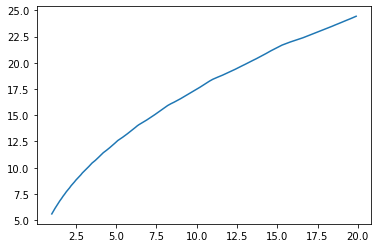

In [60]:
# curious to see how a plot of this looks
plt.plot(length_training, period_training)
# ok... something has gone wrong with the dataset
# we can fix that later
# let's build the model while we're here

In [62]:
# build the model
tf.random.set_seed(71)

model = tf.keras.Sequential([tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation="relu"),
tf.keras.layers.Dense(16, activation="relu"),
tf.keras.layers.Dense(1, activation="linear")
])
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

class haltCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') <= 10):
            self.model.stop_training = True

stopCallback = haltCallback()

model.fit(tf.expand_dims(length_training, axis=1), tf.expand_dims(period_training, axis=1), epochs=2000)

Epoch 1/2000
6/6 [==============================] - 0s 1ms/step - loss: 13.7671 - mae: 13.7671
Epoch 2/2000
6/6 [==============================] - 0s 708us/step - loss: 4.7267 - mae: 4.7267
Epoch 3/2000
6/6 [==============================] - 0s 710us/step - loss: 4.4516 - mae: 4.4516
Epoch 4/2000
6/6 [==============================] - 0s 694us/step - loss: 4.6358 - mae: 4.6358
Epoch 5/2000
6/6 [==============================] - 0s 719us/step - loss: 3.9330 - mae: 3.9330
Epoch 6/2000
6/6 [==============================] - 0s 644us/step - loss: 4.0429 - mae: 4.0429
Epoch 7/2000
6/6 [==============================] - 0s 720us/step - loss: 4.4605 - mae: 4.4605
Epoch 8/2000
6/6 [==============================] - 0s 666us/step - loss: 3.9465 - mae: 3.9465
Epoch 9/2000
6/6 [==============================] - 0s 703us/step - loss: 3.6427 - mae: 3.6427
Epoch 10/2000
6/6 [==============================] - 0s 731us/step - loss: 3.3592 - mae: 3.3592
Epoch 11/2000
6/6 [==============================

In [55]:
# let's see how the model does
print(model.predict([0.001]))
# at least it's smaller than 0.1...
print((model.predict([900])))
# need to fix issues with training data...
# something about the numerical integration is wacky

1/1 [==============================] - 0s 44ms/step
[[4.4085045]]
1/1 [==============================] - 0s 46ms/step
[[188.12387]]


1/1 [==============================] - 0s 18ms/step


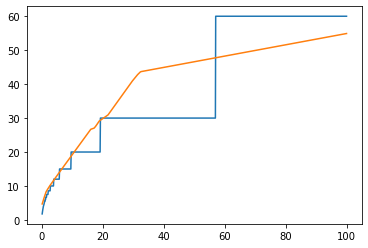

In [56]:
plt.plot(length_training, period_training)
period_predictions = []
for k in length_training:
    period_predictions.append(model.predict([k])[0][0])

plt.plot(length_training, period_predictions)
# conclusion... fix the training data first
# garbage in garbage out
# this doesn't fit the training data too badly though